## **LetsGrowMore #Oct2021**

Author - Suraj Shrimant Mane

Task-1: Stock Market Prediction And Forecasting Using Stacked LSTM

Level : Beginner

Language-Python

Software-Colab Notebook

Dataset-: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

**Reading the Dataset**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Data Sorting**

In [4]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.reset_index(inplace=True)

In [7]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


**Visualization**

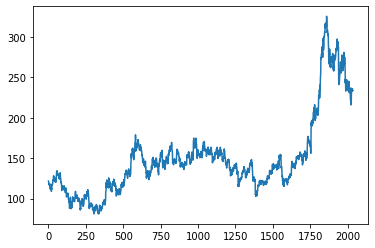

In [8]:
plt.plot(df['Close'])

In [9]:
dff=df['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

**Min Max Scaler**

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**Spliting the Dataset**

In [11]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

**convert an array of values into a dataset matrix**

In [12]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

**Spliting Data into Train and Test**

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Creating the LSTM Model**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 13s 327ms/step - loss: 0.0095 - val_loss: 0.0017
Epoch 2/60
19/19 [==============================] - 4s 208ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/60
19/19 [==============================] - 4s 204ms/step - loss: 9.4126e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 203ms/step - loss: 9.3008e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 4s 216ms/step - loss: 9.3233e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 4s 200ms/step - loss: 8.1950e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 194ms/step - loss: 8.0051e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 200ms/step - loss: 7.8151e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 208ms/step - loss: 7.4686e-04 - val_loss: 9.6269e-04
Epoch 10/60
19/19 [==============================] - 4s 204ms/step 

**Prediction and Checking Performance**

In [20]:
test_predict=model.predict(X_test)

In [21]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[138.18402 ],
       [138.34164 ],
       [137.45012 ],
       [134.81479 ],
       [133.08096 ],
       [132.5613  ],
       [133.80635 ],
       [135.5206  ],
       [136.03911 ],
       [135.64145 ],
       [135.27509 ],
       [136.32327 ],
       [137.14912 ],
       [138.69293 ],
       [140.85208 ],
       [138.98958 ],
       [136.41264 ],
       [135.84158 ],
       [136.49902 ],
       [141.45627 ],
       [146.06873 ],
       [148.28314 ],
       [148.40024 ],
       [146.08267 ],
       [145.53796 ],
       [145.30968 ],
       [145.79265 ],
       [147.52351 ],
       [148.35959 ],
       [148.33394 ],
       [148.5719  ],
       [147.39809 ],
       [144.20137 ],
       [138.62878 ],
       [135.16254 ],
       [134.26741 ],
       [134.66151 ],
       [134.14682 ],
       [132.0051  ],
       [128.38002 ],
       [125.7781  ],
       [124.59827 ],
       [122.74835 ],
       [122.0139  ],
       [120.208694],
       [117.72833 ],
       [116.970085],
       [116.7

**Calculating performance**

In [22]:
import math
from sklearn.metrics import mean_squared_error

In [23]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.06744329699861314